In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
proj_dir = "/home/tono/HyperK/PMT-analysis-osclec/"

In [21]:
def plthist(hist, title = "", logscale = True, interval = (0,0)):
    plt.bar(range(len(hist)), hist)
    if logscale:
        plt.yscale('log')
    if title:
        plt.title(title)
    if interval != (0,0):
        plt.xlim(interval)
    


In [22]:
blank = np.array( pd.read_csv(proj_dir + "data/blank.csv").iloc[:,1])
spe =np.array( pd.read_csv(proj_dir + "data/spe.csv").iloc[:,1])



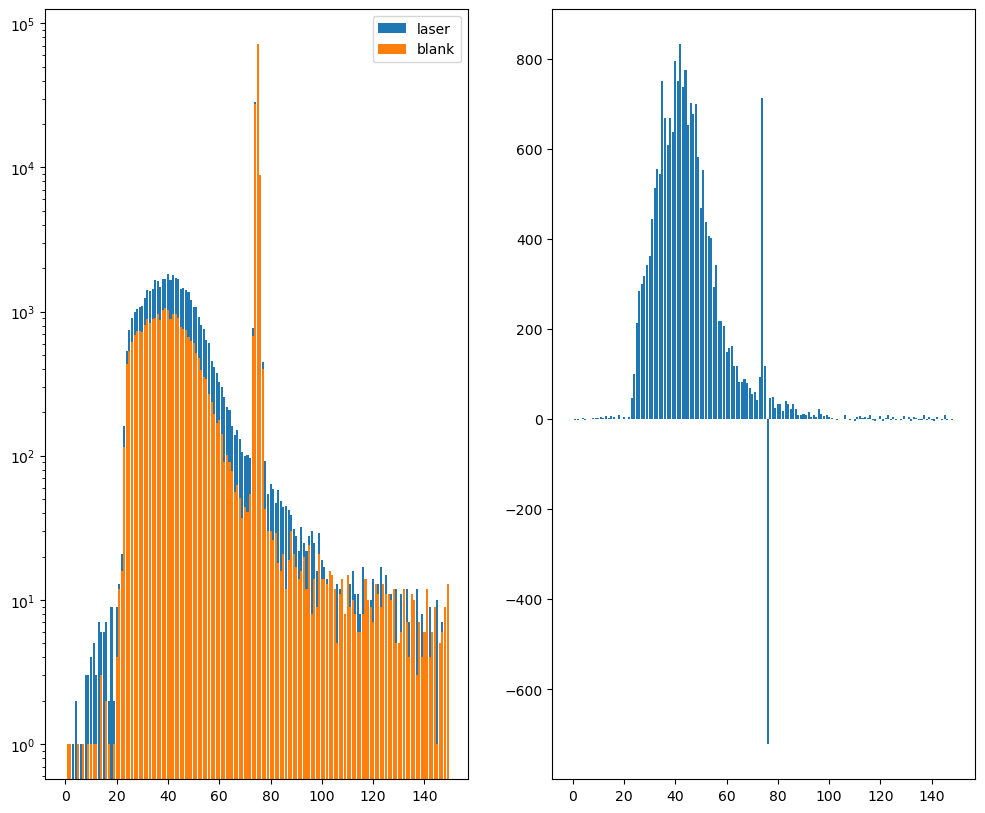

In [23]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plthist(spe)
plthist(blank)
plt.legend(["laser", "blank"])
plt.subplot(1,2,2)
subtr = spe-blank
plthist(subtr, logscale=0)

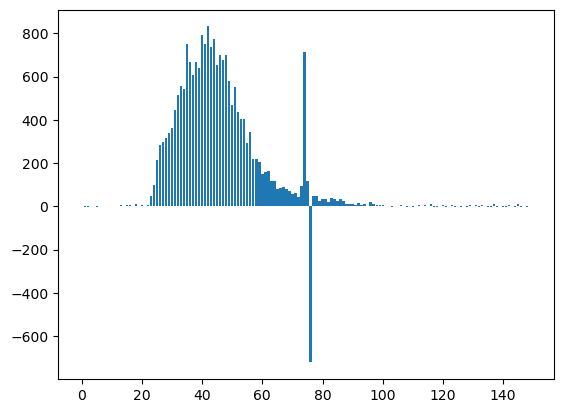

In [24]:
subtr = spe-blank
plthist(subtr, logscale=0)

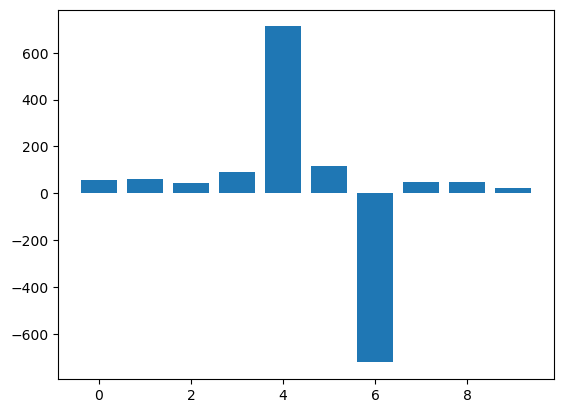

In [25]:
# get interval around HV
HV_peak_interval = (70,80)
HV_peak = subtr[HV_peak_interval[0]:HV_peak_interval[1]]
plthist(HV_peak, logscale=0)


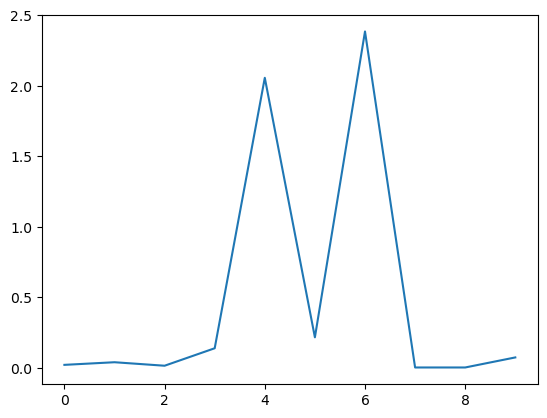

In [26]:
z_scores = np.abs(stats.zscore(HV_peak))
plt.plot(z_scores)
outlier_indices = np.where(z_scores > 1)

In [27]:
outlier_indices = np.array(outlier_indices)
outlier_indices

array([[4, 6]])

<BarContainer object of 148 artists>

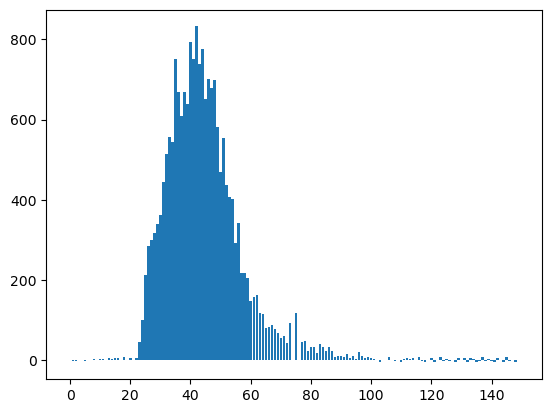

In [28]:
energy = np.arange(len(subtr))
energy = np.delete(energy,outlier_indices + HV_peak_interval[0])
subtr = np.delete(subtr,outlier_indices + HV_peak_interval[0])

plt.bar(energy,subtr)


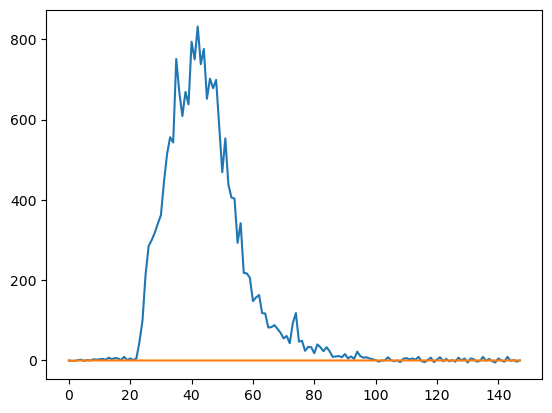

In [29]:
def gauss(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)
def fit_gauss(hist):
    x = range(len(hist))
    popt, pcov = curve_fit(gauss, x, hist)
    hist_fit = gauss(x, *popt)
    plt.plot(x,hist)
    plt.plot(x,hist_fit)
    return popt, hist_fit
popt , hist_fit = fit_gauss(subtr)